In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from os import path
import requests
import zipfile
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns; sns.set()
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
PATH = 'C:\\Users\\adity\\Documents'
DIR = 'Phishing'
FILE = 'phishing.txt'
SEP = '\\'
fileName = 'phishing.zip'
downloadLink = 'https://github.com/Adityav93/Phishing/raw/master/1553778303_phishing.zip'
directory = os.path.join(PATH, DIR)

In [2]:
def createDirIfNotExist():
    if not path.isdir(PATH+SEP+DIR):
        try:
            os.mkdir(PATH+SEP+DIR)
        except OSError:
            print ("Creation of the directory %s failed" % path)
        else:
            print ("Successfully created the directory %s " % path)


In [3]:
def download_and_extract_file(url,path,extr_path):
    resp = requests.get(url)
    zfile = open(path, 'wb+')
    zfile.write(resp.content)
    zfile.close()
    with zipfile.ZipFile(path, 'r') as zip_ref:
        zip_ref.extractall(extr_path)
    os.remove(path)

createDirIfNotExist()
download_and_extract_file(downloadLink,PATH+SEP+DIR+SEP+fileName,PATH+SEP+DIR)

Successfully created the directory <module 'ntpath' from 'C:\\ProgramData\\Anaconda3\\lib\\ntpath.py'> 


In [4]:
df = pd.read_csv(PATH+SEP+DIR+SEP+FILE, sep=",", header=None)
df.columns = ['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
              'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
              'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
              'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
              'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
              'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
              'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
              'LinksPointingToPage', 'StatsReport', 'class' ]

In [5]:
df.head(5)

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [6]:
#check if there are any null values
df.isnull().any()

UsingIP                False
LongURL                False
ShortURL               False
Symbol@                False
Redirecting//          False
PrefixSuffix-          False
SubDomains             False
HTTPS                  False
DomainRegLen           False
Favicon                False
NonStdPort             False
HTTPSDomainURL         False
RequestURL             False
AnchorURL              False
LinksInScriptTags      False
ServerFormHandler      False
InfoEmail              False
AbnormalURL            False
WebsiteForwarding      False
StatusBarCust          False
DisableRightClick      False
UsingPopupWindow       False
IframeRedirection      False
AgeofDomain            False
DNSRecording           False
WebsiteTraffic         False
PageRank               False
GoogleIndex            False
LinksPointingToPage    False
StatsReport            False
class                  False
dtype: bool

In [7]:
#check the shape of the dataframe
df.shape

(11055, 31)

In [8]:
#check info of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11055 non-null  int64
 1   LongURL              11055 non-null  int64
 2   ShortURL             11055 non-null  int64
 3   Symbol@              11055 non-null  int64
 4   Redirecting//        11055 non-null  int64
 5   PrefixSuffix-        11055 non-null  int64
 6   SubDomains           11055 non-null  int64
 7   HTTPS                11055 non-null  int64
 8   DomainRegLen         11055 non-null  int64
 9   Favicon              11055 non-null  int64
 10  NonStdPort           11055 non-null  int64
 11  HTTPSDomainURL       11055 non-null  int64
 12  RequestURL           11055 non-null  int64
 13  AnchorURL            11055 non-null  int64
 14  LinksInScriptTags    11055 non-null  int64
 15  ServerFormHandler    11055 non-null  int64
 16  InfoEmail            1

In [9]:
#check num of unique values in each column
df.nunique()

UsingIP                2
LongURL                3
ShortURL               2
Symbol@                2
Redirecting//          2
PrefixSuffix-          2
SubDomains             3
HTTPS                  3
DomainRegLen           2
Favicon                2
NonStdPort             2
HTTPSDomainURL         2
RequestURL             2
AnchorURL              3
LinksInScriptTags      3
ServerFormHandler      3
InfoEmail              2
AbnormalURL            2
WebsiteForwarding      2
StatusBarCust          2
DisableRightClick      2
UsingPopupWindow       2
IframeRedirection      2
AgeofDomain            2
DNSRecording           2
WebsiteTraffic         3
PageRank               2
GoogleIndex            2
LinksPointingToPage    3
StatsReport            2
class                  2
dtype: int64

In [10]:
df.describe()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#Print the columns which are biased
for col in df.columns:
    val_list = list(df[col].value_counts())
    key_list = df[col].unique()
    val_sum = sum(val_list)
    for val,key in zip(val_list,key_list):
        if ((val*100)/val_sum) > 80:
            print(col)
            print(df[col].value_counts())
            print("column "+col+" is biased towards value: "+str(key)+"\n")

LongURL
-1    8960
 1    1960
 0     135
Name: LongURL, dtype: int64
column LongURL is biased towards value: 1

ShortURL
 1    9611
-1    1444
Name: ShortURL, dtype: int64
column ShortURL is biased towards value: 1

Symbol@
 1    9400
-1    1655
Name: Symbol@, dtype: int64
column Symbol@ is biased towards value: 1

Redirecting//
 1    9626
-1    1429
Name: Redirecting//, dtype: int64
column Redirecting// is biased towards value: -1

PrefixSuffix-
-1    9590
 1    1465
Name: PrefixSuffix-, dtype: int64
column PrefixSuffix- is biased towards value: -1

Favicon
 1    9002
-1    2053
Name: Favicon, dtype: int64
column Favicon is biased towards value: 1

NonStdPort
 1    9553
-1    1502
Name: NonStdPort, dtype: int64
column NonStdPort is biased towards value: 1

HTTPSDomainURL
 1    9259
-1    1796
Name: HTTPSDomainURL, dtype: int64
column HTTPSDomainURL is biased towards value: -1

InfoEmail
 1    9041
-1    2014
Name: InfoEmail, dtype: int64
column InfoEmail is biased towards value: -1

A

In [12]:
X,y = df.drop(['class'],axis=1),df['class']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [14]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7738, 30) (3317, 30) (7738,) (3317,)


In [15]:
clf = LogisticRegression(random_state=0,C=100)
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.9219173952366596


In [16]:
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print(scores.mean())
print(scores.std())

[0.92446857 0.92763455 0.923564   0.91451832 0.92265943]
0.922568973315242
0.004360731177998737


# HyperParameter tuning

In [17]:
clf.get_params()

{'C': 100,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [18]:
C = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
class_weight = ['dict', 'balanced', 'none']
dual = [True,False]
fit_intercept = [True,False]
penalty = ['l1', 'l2', 'elasticnet', 'none']
l1_ratio = [0,0.2,0.4,0.6,0.8,1]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [4000]
random_grid = {'C': C,
               'class_weight': class_weight,
               'fit_intercept':fit_intercept,
               'solver':solver,
               'dual': dual,
               'penalty': penalty,
               'l1_ratio': l1_ratio,
               'max_iter': max_iter
              }
print(random_grid)

{'C': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'class_weight': ['dict', 'balanced', 'none'], 'fit_intercept': [True, False], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'dual': [True, False], 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1], 'max_iter': [4000]}


In [19]:
clf = LogisticRegression(random_state=0)
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 9600, cv = 3, verbose=2, n_jobs = -1)
clf_random.fit(X_train, y_train)
clf_random.best_params_

Fitting 3 folds for each of 9600 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 613 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 1117 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 1797 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2605 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3794 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4720 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 6036 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 7214 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 8760 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10601 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 12547 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 14529 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 16400 tasks   

{'solver': 'saga',
 'penalty': 'elasticnet',
 'max_iter': 4000,
 'l1_ratio': 0.4,
 'fit_intercept': True,
 'dual': False,
 'class_weight': 'dict',
 'C': 10}

In [20]:
clf = LogisticRegression(random_state = 0, max_iter = 4000, C = 150, solver = 'newton-cg', penalty = 'none', l1_ratio = 0.2, fit_intercept = True, dual = False, class_weight = 'none')
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print("Test Score: "+str(clf.score(X_test, y_test)))

Test Score: 0.9219173952366596


In [21]:
scores = cross_val_score(clf, X, y, cv=5)
print("crossval scores: "+str(scores))
print("Mean crossval score: "+str(scores.mean()))
print("Std dev: "+str(scores.std()))

crossval scores: [0.92446857 0.92763455 0.923564   0.91451832 0.92265943]
Mean crossval score: 0.922568973315242
Std dev: 0.004360731177998737


# Conclusion

 We see that the crossval score remained same even after hyperparameter tuning.

# Random Forest

In [22]:
X,y = df.drop(['class'],axis=1),df['class']

In [23]:
X.shape,y.shape

((11055, 30), (11055,))

In [24]:
#Apply RandomForest Classifier and crossvalidate using stratifiedKFold Method

kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=45)
cv_score =[]
f1_scores = []
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    #model
    clf = RandomForestClassifier(n_estimators=100,random_state=100,criterion='entropy',n_jobs=-1)
    clf.fit(xtr,ytr)
    ypred = clf.predict(xvl)
    score = metrics.accuracy_score(yvl,ypred)
    f1_score = metrics.f1_score(yvl,ypred,average='weighted')
    print('score: '+str(score)+' f1_score: '+str(f1_score))
    cv_score.append(score)
    f1_scores.append(f1_score)
    print(metrics.classification_report(yvl, ypred, labels=[1.0,2.0,3.0,4.0]))
    print('Confusion matrix '+'\n',metrics.confusion_matrix(yvl,ypred))
    print('\n\n')
    i+=1
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
print('\n\n')
print('f1_score',f1_scores,'\nMean f1 weighted Score',np.mean(f1_scores))

1 of KFold 10
score: 0.9629294755877035 f1_score: 0.9628018419068918
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       616
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

   micro avg       0.95      0.99      0.97       616
   macro avg       0.24      0.25      0.24       616
weighted avg       0.95      0.99      0.97       616

Confusion matrix 
 [[456  34]
 [  7 609]]



2 of KFold 10
score: 0.9737793851717902 f1_score: 0.9737591359468284
              precision    recall  f1-score   support

         1.0       0.97      0.98      0.98       616
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

   micro avg       0.97      0.98      0.98       616
   macro avg       0.24      0.25      0.24       616
we

# HyperParameter Tuning

In [25]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [26]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.5min finished


{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [27]:
#Apply RandomForest Classifier and crossvalidate using stratifiedKFold Method

kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=45)
cv_score =[]
f1_scores = []
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    #model
    clf = RandomForestClassifier(n_estimators=1000,random_state=100,min_samples_split=2,min_samples_leaf=1,
                                 max_features='auto',max_depth=50,bootstrap=False,criterion='entropy',n_jobs=-1)
    clf.fit(xtr,ytr)
    ypred = clf.predict(xvl)
    score = metrics.accuracy_score(yvl,ypred)
    f1_score = metrics.f1_score(yvl,ypred,average='weighted')
    print('score: '+str(score)+' f1_score: '+str(f1_score))
    cv_score.append(score)
    f1_scores.append(f1_score)
    print(metrics.classification_report(yvl, ypred, labels=[1.0,2.0,3.0,4.0]))
    print('Confusion matrix '+'\n',metrics.confusion_matrix(yvl,ypred))
    print('\n\n')
    i+=1
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
print('\n\n')
print('f1_score',f1_scores,'\nMean f1 weighted Score',np.mean(f1_scores))

1 of KFold 10
score: 0.9638336347197106 f1_score: 0.9637356121203354
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       616
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

   micro avg       0.95      0.99      0.97       616
   macro avg       0.24      0.25      0.24       616
weighted avg       0.95      0.99      0.97       616

Confusion matrix 
 [[459  31]
 [  9 607]]



2 of KFold 10
score: 0.9755877034358047 f1_score: 0.9755688507091161
              precision    recall  f1-score   support

         1.0       0.97      0.98      0.98       616
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

   micro avg       0.97      0.98      0.98       616
   macro avg       0.24      0.25      0.24       616
we

# Conclusion

We see that Random Forest generates better accuracy and f1 score compared to Logistic Regression.
we also notice that hyperparameter tuning lead to very small increase in the accuracy and f1 score

# Lets try XGboost Classifier as well

In [28]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.38%


In [29]:
scores = cross_val_score(model, X, y, cv=5)
print(scores*100)
print(scores.mean()*100,'%')
print(scores.std()*100,'%')

[98.00995025 97.55766621 97.69335142 96.20081411 94.12030755]
96.71641791044777 %
1.4381209945912024 %


# Hyperparmeter tuning

In [30]:
model.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [31]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(1, 50, num = 20)]
max_depth.append(None)
booster = ['gbtree','gblinear','dart']
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
max_delta_step = [0,1,2,3,4,5]
min_child_weight = [1,2,3,4,5]
gamma = [0,5,10,15,20,25]
tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'booster': booster,
               'learning_rate': learning_rate,
               'max_delta_step': max_delta_step,
               'min_child_weight': min_child_weight,
               'gamma': gamma,
               'tree_method': tree_method}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [1, 3, 6, 8, 11, 13, 16, 19, 21, 24, 26, 29, 31, 34, 37, 39, 42, 44, 47, 50, None], 'booster': ['gbtree', 'gblinear', 'dart'], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'max_delta_step': [0, 1, 2, 3, 4, 5], 'min_child_weight': [1, 2, 3, 4, 5], 'gamma': [0, 5, 10, 15, 20, 25], 'tree_method': ['auto', 'exact', 'approx', 'hist', 'gpu_hist']}


In [32]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf = XGBClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf_random.fit(X_train, y_train)
clf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 24.1min finished


{'tree_method': 'approx',
 'n_estimators': 2000,
 'min_child_weight': 5,
 'max_depth': 21,
 'max_delta_step': 4,
 'learning_rate': 0.1,
 'gamma': 0,
 'booster': 'gbtree'}

In [33]:
model = XGBClassifier(tree_method = 'auto', n_estimators = 1200, min_child_weight = 4, max_depth = 44, max_delta_step = 1, 
                      learning_rate = 0.3, gamma = 0, booster = 'dart')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

scores = cross_val_score(model, X, y, cv=5)
print(scores*100)
print(scores.mean()*100,'%')
print(scores.std()*100,'%')

Accuracy: 97.24%
[98.46223428 97.91949344 97.73857983 95.70330167 93.71325192]
96.7073722297603 %
1.7655073983600122 %


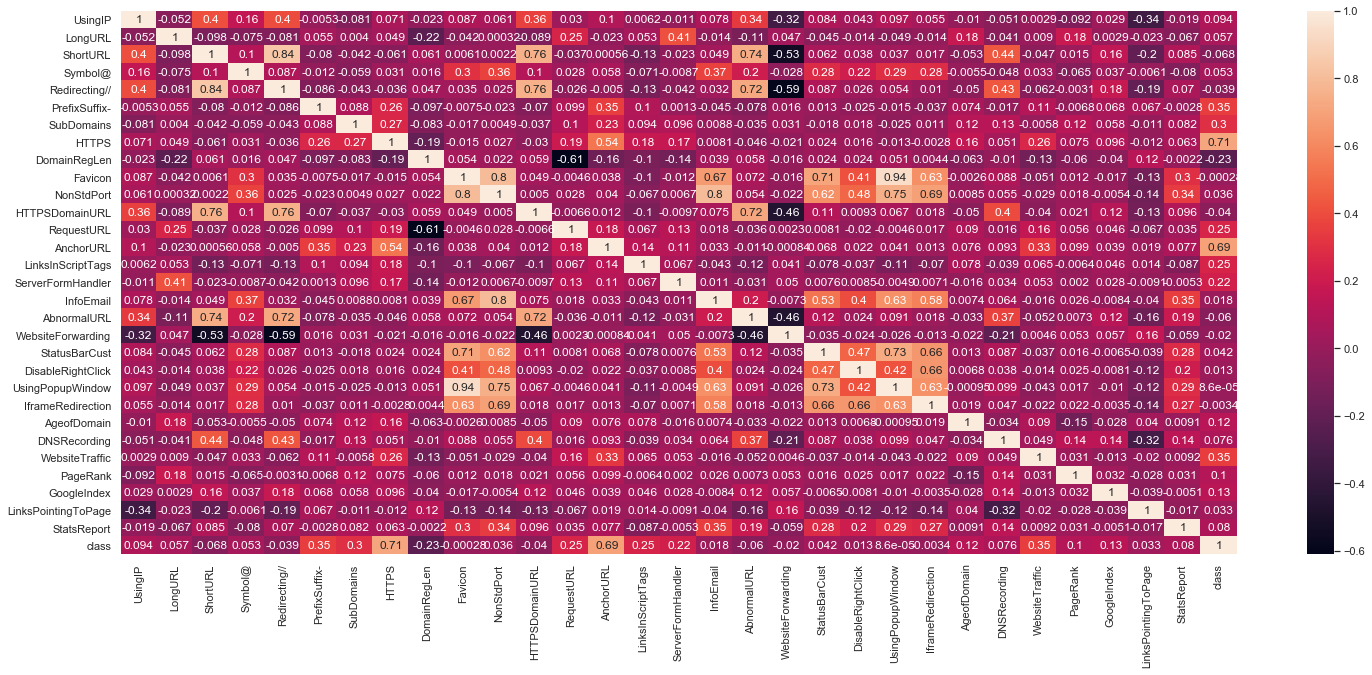

In [34]:
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,ax=ax)

In [35]:
#From the above heat map, we see that shorturl , Favicon and InfoEmail are highly corrrelated with one or more other cols, hence we'll drop these 
#columns and build model again
remove_cols = ['ShortURL','Favicon','InfoEmail']
df.drop(columns=remove_cols,inplace=True,axis=1)
df.columns

Index(['UsingIP', 'LongURL', 'Symbol@', 'Redirecting//', 'PrefixSuffix-',
       'SubDomains', 'HTTPS', 'DomainRegLen', 'NonStdPort', 'HTTPSDomainURL',
       'RequestURL', 'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler',
       'AbnormalURL', 'WebsiteForwarding', 'StatusBarCust',
       'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection',
       'AgeofDomain', 'DNSRecording', 'WebsiteTraffic', 'PageRank',
       'GoogleIndex', 'LinksPointingToPage', 'StatsReport', 'class'],
      dtype='object')

In [36]:
X,y = df.drop(['class'],axis=1),df['class']

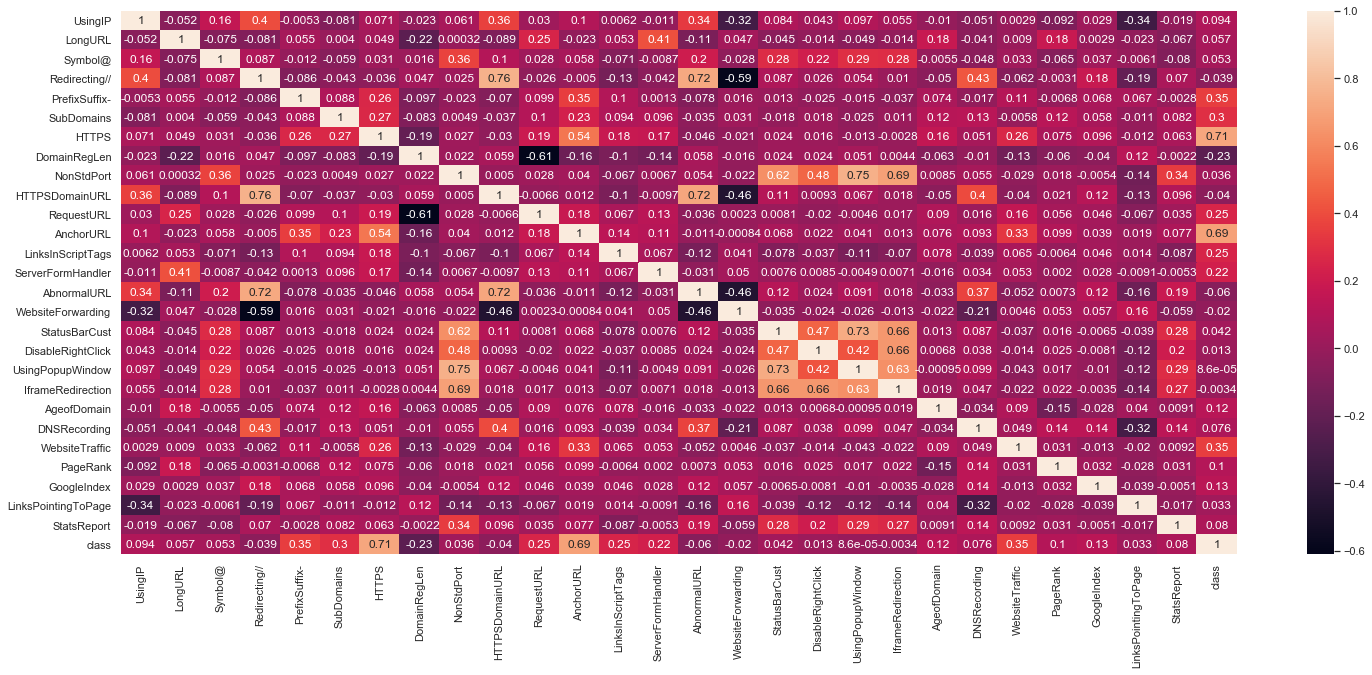

In [37]:
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,ax=ax)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [39]:
clf = LogisticRegression(random_state = 0, max_iter = 4000, C = 150, solver = 'newton-cg', penalty = 'none', l1_ratio = 0.2, fit_intercept = True, dual = False, class_weight = 'none')
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print("Test Score: "+str(clf.score(X_test, y_test)))

Test Score: 0.9201085318058486


In [40]:
scores = cross_val_score(clf, X, y, cv=5)
print("crossval scores: "+str(scores))
print("Mean crossval score: "+str(scores.mean()))
print("Std dev: "+str(scores.std()))

crossval scores: [0.923564   0.92763455 0.923564   0.91361375 0.91858887]
Mean crossval score: 0.9213930348258706
Std dev: 0.004832459661399591


In [41]:
#Apply RandomForest Classifier and crossvalidate using stratifiedKFold Method
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=45)
cv_score =[]
f1_scores = []
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    #model
    clf = RandomForestClassifier(n_estimators=1000,random_state=100,min_samples_split=2,min_samples_leaf=1,
                                 max_features='auto',max_depth=50,bootstrap=False,criterion='entropy',n_jobs=-1)
    clf.fit(xtr,ytr)
    ypred = clf.predict(xvl)
    score = metrics.accuracy_score(yvl,ypred)
    f1_score = metrics.f1_score(yvl,ypred,average='weighted')
    print('score: '+str(score)+' f1_score: '+str(f1_score))
    cv_score.append(score)
    f1_scores.append(f1_score)
    print(metrics.classification_report(yvl, ypred, labels=[1.0,2.0,3.0,4.0]))
    print('Confusion matrix '+'\n',metrics.confusion_matrix(yvl,ypred))
    print('\n\n')
    i+=1
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
print('\n\n')
print('f1_score',f1_scores,'\nMean f1 weighted Score',np.mean(f1_scores))

1 of KFold 10
score: 0.9629294755877035 f1_score: 0.9628236995802092
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       616
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

   micro avg       0.95      0.99      0.97       616
   macro avg       0.24      0.25      0.24       616
weighted avg       0.95      0.99      0.97       616

Confusion matrix 
 [[458  32]
 [  9 607]]



2 of KFold 10
score: 0.9755877034358047 f1_score: 0.9755630887722659
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       616
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

   micro avg       0.97      0.99      0.98       616
   macro avg       0.24      0.25      0.24       616
we

In [42]:
model = XGBClassifier(tree_method = 'auto', n_estimators = 1200, min_child_weight = 4, max_depth = 44, max_delta_step = 1, 
                      learning_rate = 0.3, gamma = 0, booster = 'dart')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

scores = cross_val_score(model, X, y, cv=5)
print(scores*100)
print(scores.mean()*100,'%')
print(scores.std()*100,'%')

Accuracy: 96.92%
[98.46223428 97.91949344 97.73857983 95.79375848 93.62279512]
96.7073722297603 %
1.786699405506047 %


# Feature Selection

Since we have only categorical columns in our dataset, we will use anova to find the Features which affect the predictor valriable the most

In [43]:
df1 = df.drop(['class'],axis=1)
df1.shape

(11055, 27)

In [44]:
df.rename(columns={'class':'Label'},inplace=True)

In [45]:
df.rename(columns={'Symbol@':'Symbol','Redirecting//':'Redirecting','PrefixSuffix-':'PrefixSuffix'},inplace=True)

In [46]:
df.columns

Index(['UsingIP', 'LongURL', 'Symbol', 'Redirecting', 'PrefixSuffix',
       'SubDomains', 'HTTPS', 'DomainRegLen', 'NonStdPort', 'HTTPSDomainURL',
       'RequestURL', 'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler',
       'AbnormalURL', 'WebsiteForwarding', 'StatusBarCust',
       'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection',
       'AgeofDomain', 'DNSRecording', 'WebsiteTraffic', 'PageRank',
       'GoogleIndex', 'LinksPointingToPage', 'StatsReport', 'Label'],
      dtype='object')

In [47]:
for col in df.columns:
    lm = ols('{} ~ Label'.format(col),data=df).fit()
    table = sm.stats.anova_lm(lm)
    print(col,table[['PR(>F)']][0:1])

UsingIP              PR(>F)
Label  3.367488e-23
LongURL              PR(>F)
Label  1.516370e-09
Symbol              PR(>F)
Label  2.542215e-08
Redirecting          PR(>F)
Label  0.000049
PrefixSuffix               PR(>F)
Label  2.268994e-313
SubDomains               PR(>F)
Label  4.918451e-226
HTTPS        PR(>F)
Label     0.0
DomainRegLen               PR(>F)
Label  8.626486e-128
NonStdPort          PR(>F)
Label  0.000128
HTTPSDomainURL          PR(>F)
Label  0.000028
RequestURL               PR(>F)
Label  1.680068e-161
AnchorURL        PR(>F)
Label     0.0
LinksInScriptTags               PR(>F)
Label  6.958664e-155
ServerFormHandler               PR(>F)
Label  7.625564e-123
AbnormalURL              PR(>F)
Label  1.953576e-10
WebsiteForwarding         PR(>F)
Label  0.03445
StatusBarCust          PR(>F)
Label  0.000011
DisableRightClick         PR(>F)
Label  0.18342
UsingPopupWindow          PR(>F)
Label  0.992796
IframeRedirection          PR(>F)
Label  0.721268
AgeofDomain           

From the above anova result, we see that columns DisableRightClick,UsingPopupWindow and IframeRedirection have 
p values > 0.05 , hence we conclude that these columns do not effect the prediction of class, hence we can drop these columns

In [48]:
df.columns

Index(['UsingIP', 'LongURL', 'Symbol', 'Redirecting', 'PrefixSuffix',
       'SubDomains', 'HTTPS', 'DomainRegLen', 'NonStdPort', 'HTTPSDomainURL',
       'RequestURL', 'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler',
       'AbnormalURL', 'WebsiteForwarding', 'StatusBarCust',
       'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection',
       'AgeofDomain', 'DNSRecording', 'WebsiteTraffic', 'PageRank',
       'GoogleIndex', 'LinksPointingToPage', 'StatsReport', 'Label'],
      dtype='object')

In [50]:
df.drop(['DisableRightClick','UsingPopupWindow','IframeRedirection'],axis=1,inplace=True)

In [51]:
X = df.drop('Label',axis=1)
y = df['Label']

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [53]:
clf = LogisticRegression(random_state = 0, max_iter = 4000, C = 150, solver = 'newton-cg', penalty = 'none', l1_ratio = 0.2, fit_intercept = True, dual = False, class_weight = 'none')
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print("Test Score: "+str(clf.score(X_test, y_test)))

Test Score: 0.9207114862827857


In [54]:
scores = cross_val_score(clf, X, y, cv=5)
print("crossval scores: "+str(scores))
print("Mean crossval score: "+str(scores.mean()))
print("Std dev: "+str(scores.std()))

crossval scores: [0.92265943 0.92763455 0.92401628 0.91542289 0.91587517]
Mean crossval score: 0.9211216644052465
Std dev: 0.004757374506487434


In [55]:
#Apply RandomForest Classifier and crossvalidate using stratifiedKFold Method
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=45)
cv_score =[]
f1_scores = []
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    #model
    clf = RandomForestClassifier(n_estimators=1000,random_state=100,min_samples_split=2,min_samples_leaf=1,
                                 max_features='auto',max_depth=50,bootstrap=False,criterion='entropy',n_jobs=-1)
    clf.fit(xtr,ytr)
    ypred = clf.predict(xvl)
    score = metrics.accuracy_score(yvl,ypred)
    f1_score = metrics.f1_score(yvl,ypred,average='weighted')
    print('score: '+str(score)+' f1_score: '+str(f1_score))
    cv_score.append(score)
    f1_scores.append(f1_score)
    print(metrics.classification_report(yvl, ypred, labels=[1.0,2.0,3.0,4.0]))
    print('Confusion matrix '+'\n',metrics.confusion_matrix(yvl,ypred))
    print('\n\n')
    i+=1
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
print('\n\n')
print('f1_score',f1_scores,'\nMean f1 weighted Score',np.mean(f1_scores))

1 of KFold 10
score: 0.9629294755877035 f1_score: 0.9628236995802092
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       616
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

   micro avg       0.95      0.99      0.97       616
   macro avg       0.24      0.25      0.24       616
weighted avg       0.95      0.99      0.97       616

Confusion matrix 
 [[458  32]
 [  9 607]]



2 of KFold 10
score: 0.9737793851717902 f1_score: 0.9737591359468284
              precision    recall  f1-score   support

         1.0       0.97      0.98      0.98       616
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

   micro avg       0.97      0.98      0.98       616
   macro avg       0.24      0.25      0.24       616
we

In [56]:
model = XGBClassifier(tree_method = 'auto', n_estimators = 1200, min_child_weight = 4, max_depth = 44, max_delta_step = 1, 
                      learning_rate = 0.3, gamma = 0, booster = 'dart')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

scores = cross_val_score(model, X, y, cv=5)
print(scores*100)
print(scores.mean()*100,'%')
print(scores.std()*100,'%')

Accuracy: 96.92%
[98.41700588 97.82903664 97.78380823 95.43193125 93.93939394]
96.68023518769786 %
1.7102318045977962 %


# Conclusion

Based on the accuracy values, we conclude that the Random Forest Classifier performs well and hence we select that model